In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
df = pd.read_csv('airbnb_listings.csv')
df.head()

,Unnamed: 0,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


In [31]:
#너무 컬럼이 많아서 좀 지울게요 
df.drop(columns = ['host_response_time','host_response_rate', 'host_acceptance_rate','host_is_superhost', 'host_listings_count',
'host_total_listings_count','host_verifications','host_has_profile_pic' ,'host_identity_verified' ,'neighborhood' ,'latitude',
'longitude','is_location_exact','property_type','room_type','accommodates', 'bathrooms','bedrooms', 'beds', 'bed_type', 'amenities'  ], inplace = True)
df.isna().sum()/len(df)*100

Unnamed: 0                           0.000000
id                                   0.000000
square_feet                         99.234192
price                                0.000000
weekly_price                        89.398772
monthly_price                       90.792582
security_deposit                    34.107016
guests_included                      0.000000
extra_people                         0.000000
minimum_nights                       0.000000
maximum_nights                       0.000000
has_availability                     0.000000
availability_30                      0.000000
availability_60                      0.000000
availability_90                      0.000000
availability_365                     0.000000
number_of_reviews                    0.000000
number_of_reviews_ltm                0.000000
review_scores_rating                22.503740
review_scores_accuracy              22.572644
review_scores_cleanliness           22.545082
review_scores_checkin             

In [32]:
#결측치 비율 높은 거 제거
df.drop(columns = ['square_feet','weekly_price','monthly_price','license','jurisdiction_names','security_deposit'], inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50796 entries, 0 to 50795
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        50796 non-null  int64  
 1   id                                50796 non-null  int64  
 2   price                             50796 non-null  int64  
 3   guests_included                   50796 non-null  int64  
 4   extra_people                      50796 non-null  object 
 5   minimum_nights                    50796 non-null  int64  
 6   maximum_nights                    50796 non-null  int64  
 7   has_availability                  50796 non-null  object 
 8   availability_30                   50796 non-null  int64  
 9   availability_60                   50796 non-null  int64  
 10  availability_90                   50796 non-null  int64  
 11  availability_365                  50796 non-null  int64  
 12  numb

In [34]:
columns = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
for c in columns:
    df[c] = df[c].fillna(df[c].median())

In [35]:
df.isna().sum()/len(df)*100

Unnamed: 0                          0.0
id                                  0.0
price                               0.0
guests_included                     0.0
extra_people                        0.0
minimum_nights                      0.0
maximum_nights                      0.0
has_availability                    0.0
availability_30                     0.0
availability_60                     0.0
availability_90                     0.0
availability_365                    0.0
number_of_reviews                   0.0
number_of_reviews_ltm               0.0
review_scores_rating                0.0
review_scores_accuracy              0.0
review_scores_cleanliness           0.0
review_scores_checkin               0.0
review_scores_communication         0.0
review_scores_location              0.0
review_scores_value                 0.0
requires_license                    0.0
instant_bookable                    0.0
is_business_travel_ready            0.0
cancellation_policy                 0.0


In [36]:
#범주형 너무 많아서 몇개는 드롭할게요
df.drop(columns = ['extra_people','requires_license','cancellation_policy',
                  'require_guest_profile_picture','require_guest_phone_verification'], inplace = True)


In [38]:
columns = ['has_availability','instant_bookable','is_business_travel_ready']
for c in columns:
           print(c, df[c].nunique())

has_availability 1
instant_bookable 2
is_business_travel_ready 1


In [40]:
df[['has_availability','instant_bookable','is_business_travel_ready']]

,has_availability,instant_bookable,is_business_travel_ready
0,t,f,f
1,t,f,f
2,t,f,f
3,t,f,f
4,t,f,f
...,...,...,...
50791,t,t,f
50792,t,t,f
50793,t,t,f
50794,t,f,f


In [42]:
df.drop(columns = ['has_availability','is_business_travel_ready'],inplace=True)

In [43]:
print(df['instant_bookable'].unique())

['f' 't']


In [44]:
from sklearn.preprocessing import LabelEncoder
df['instant_bookable'] = LabelEncoder().fit_transform(df['instant_bookable'])
df['instant_bookable']

0        0
1        0
2        0
3        0
4        0
        ..
50791    1
50792    1
50793    1
50794    0
50795    0
Name: instant_bookable, Length: 50796, dtype: int32

In [45]:
df

,Unnamed: 0,id,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,0,2060,100,1,1,730,30,60,90,365,...,0,80.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.01
1,1,2595,225,1,7,1125,4,34,64,339,...,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0.38
2,2,3831,89,1,1,730,6,10,13,151,...,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,0,4.71
3,3,5099,200,2,3,21,0,0,0,0,...,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,0.59
4,4,5114,94,1,1,730,30,60,90,109,...,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,50791,42890680,150,1,5,1125,25,55,85,271,...,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.64
50792,50792,42890730,149,1,2,5,23,53,83,83,...,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.64
50793,50793,42891018,188,1,3,30,30,60,90,365,...,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.64
50794,50794,42891637,1100,1,1,1125,23,28,29,29,...,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.64


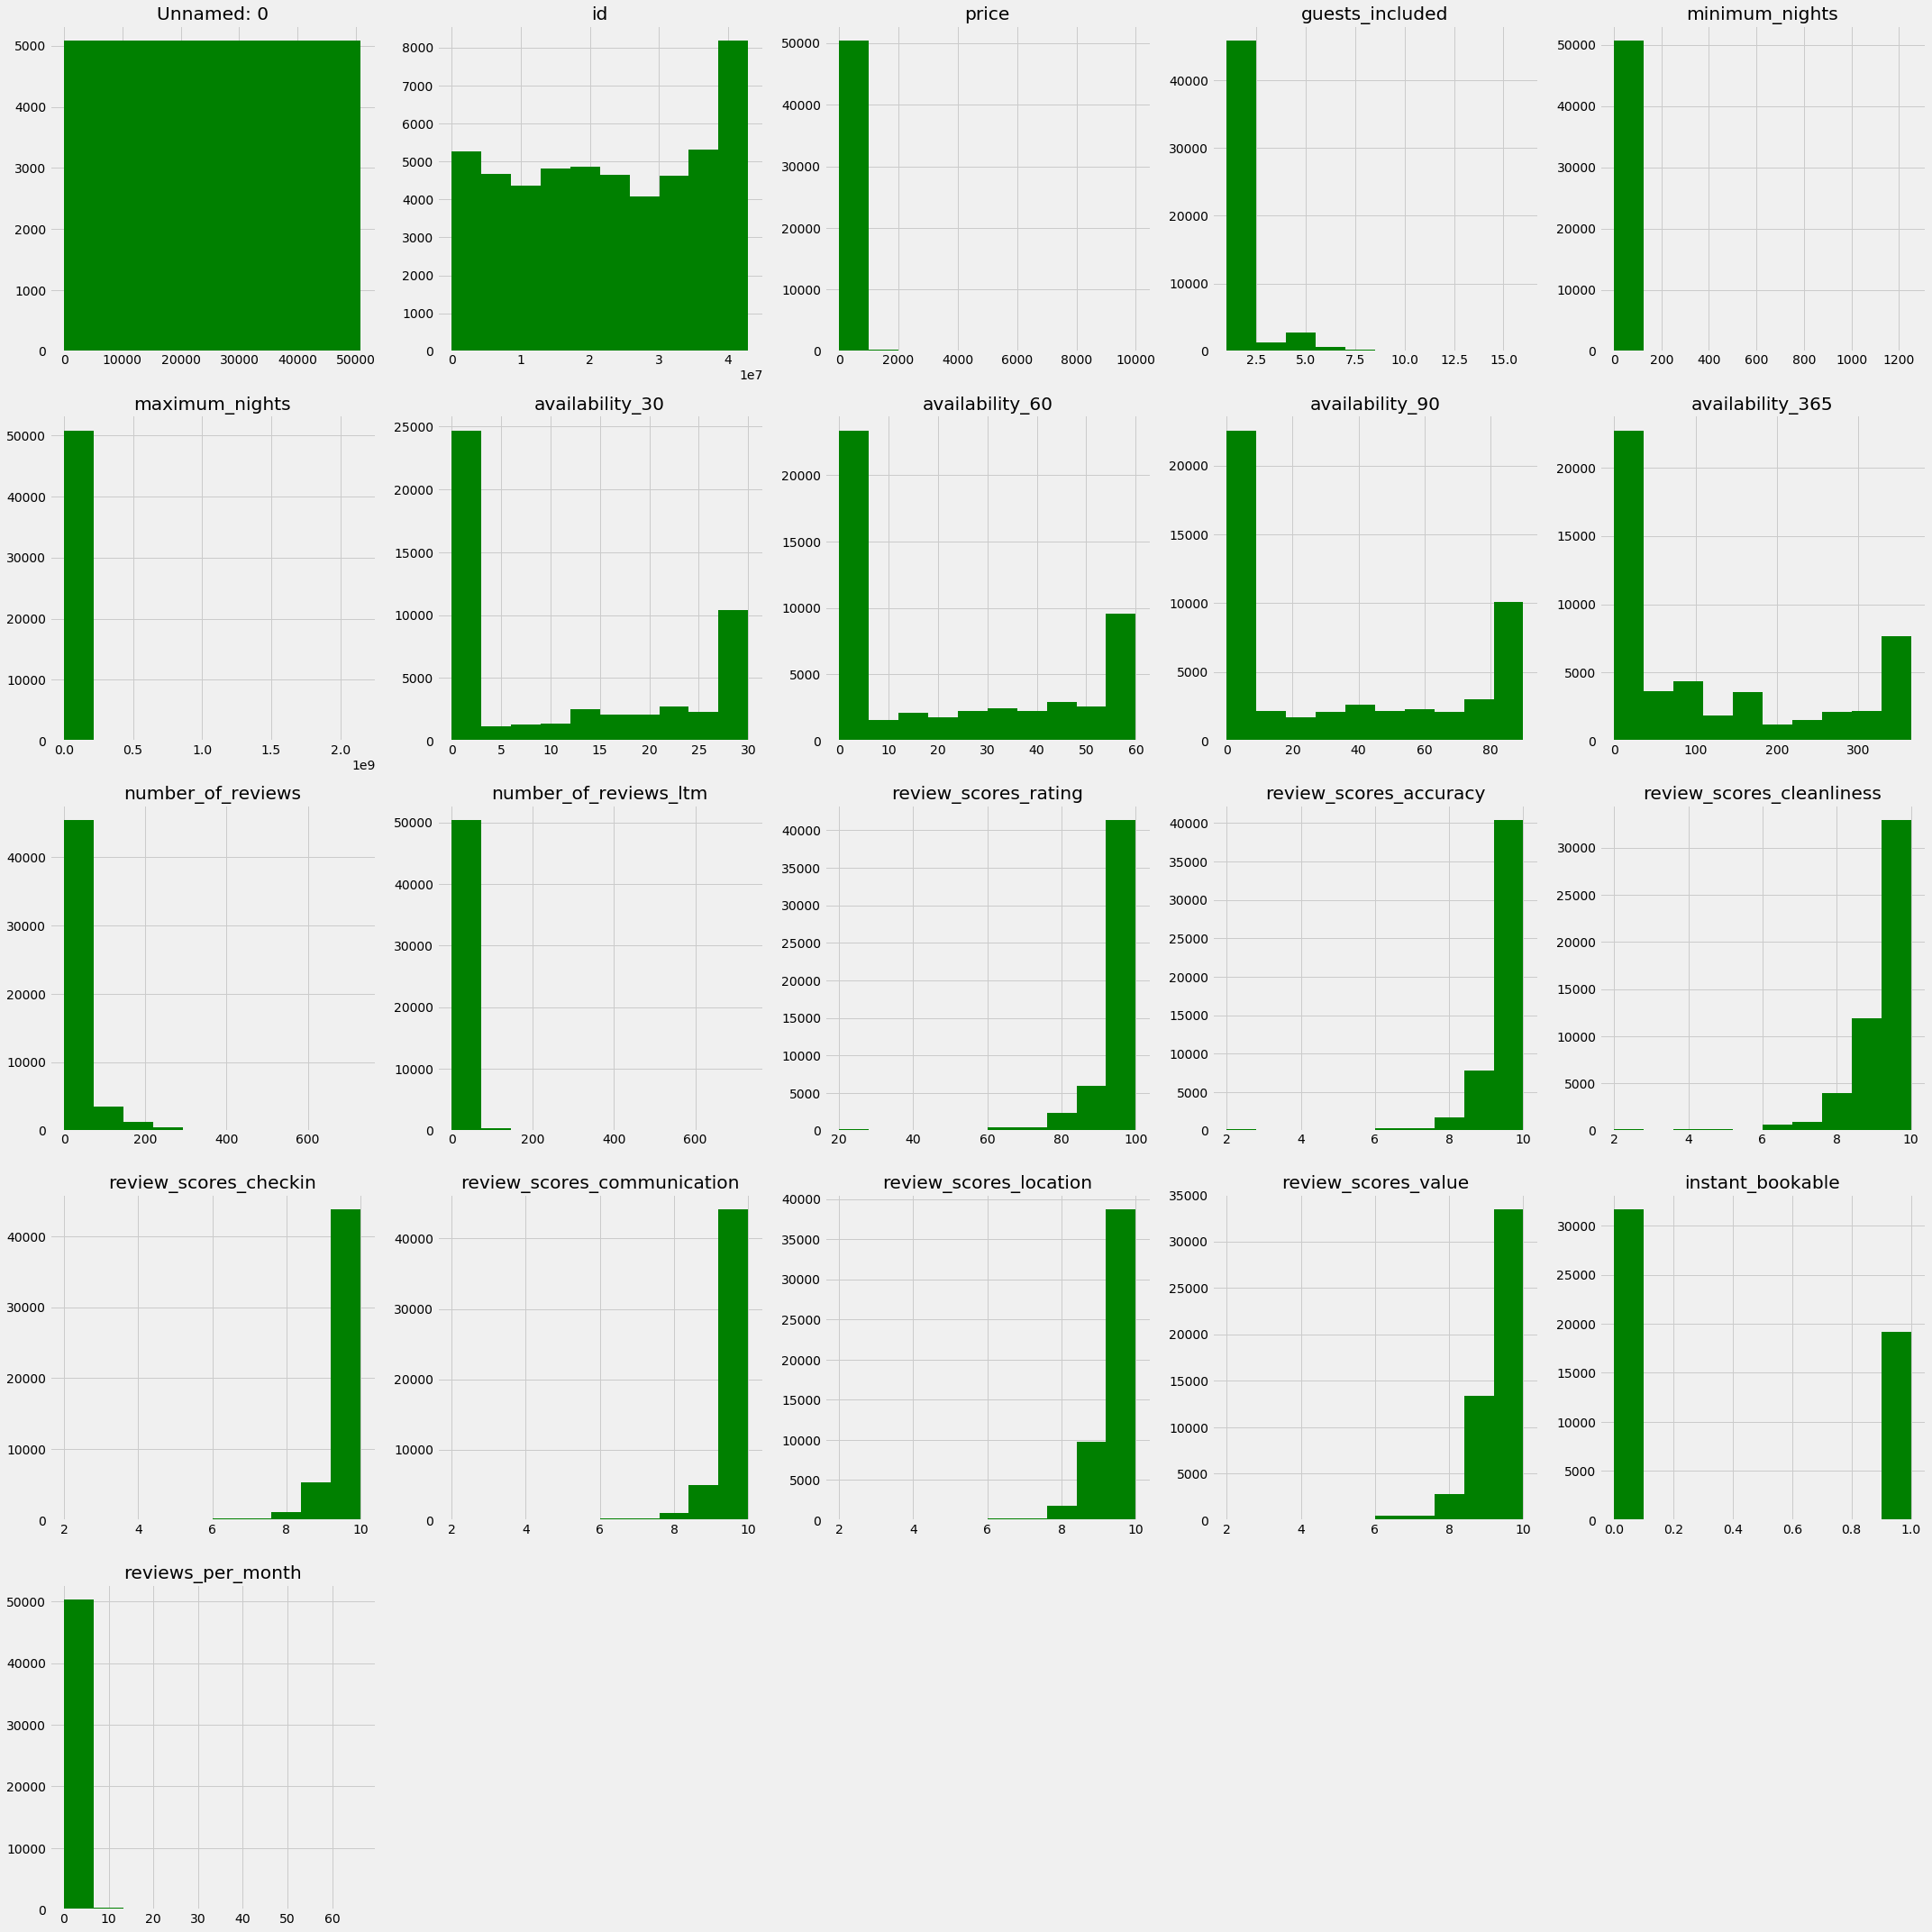

In [47]:
plt.figure(figsize=(30,30))
for i, col in enumerate(df.columns.to_list()):
    plt.subplot(5,5,i+1)
    plt.hist(df[col], label = col, color = 'green')
    plt.title(col)
    plt.tight_layout()

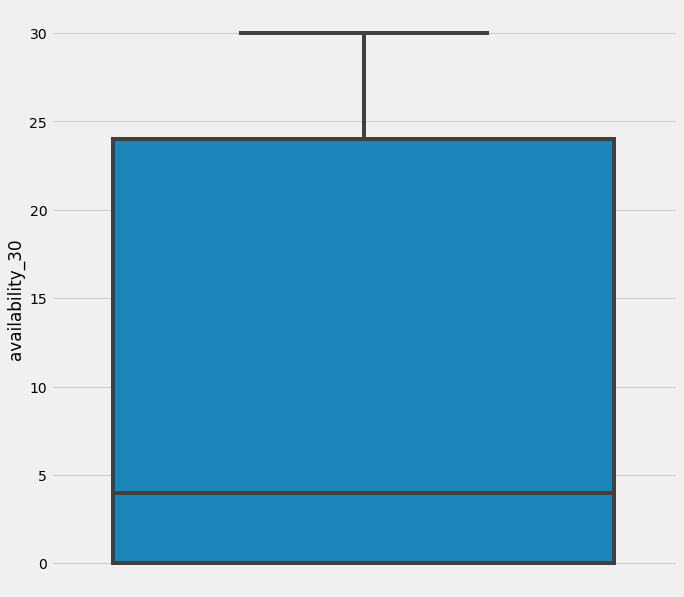

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y='availability_30')

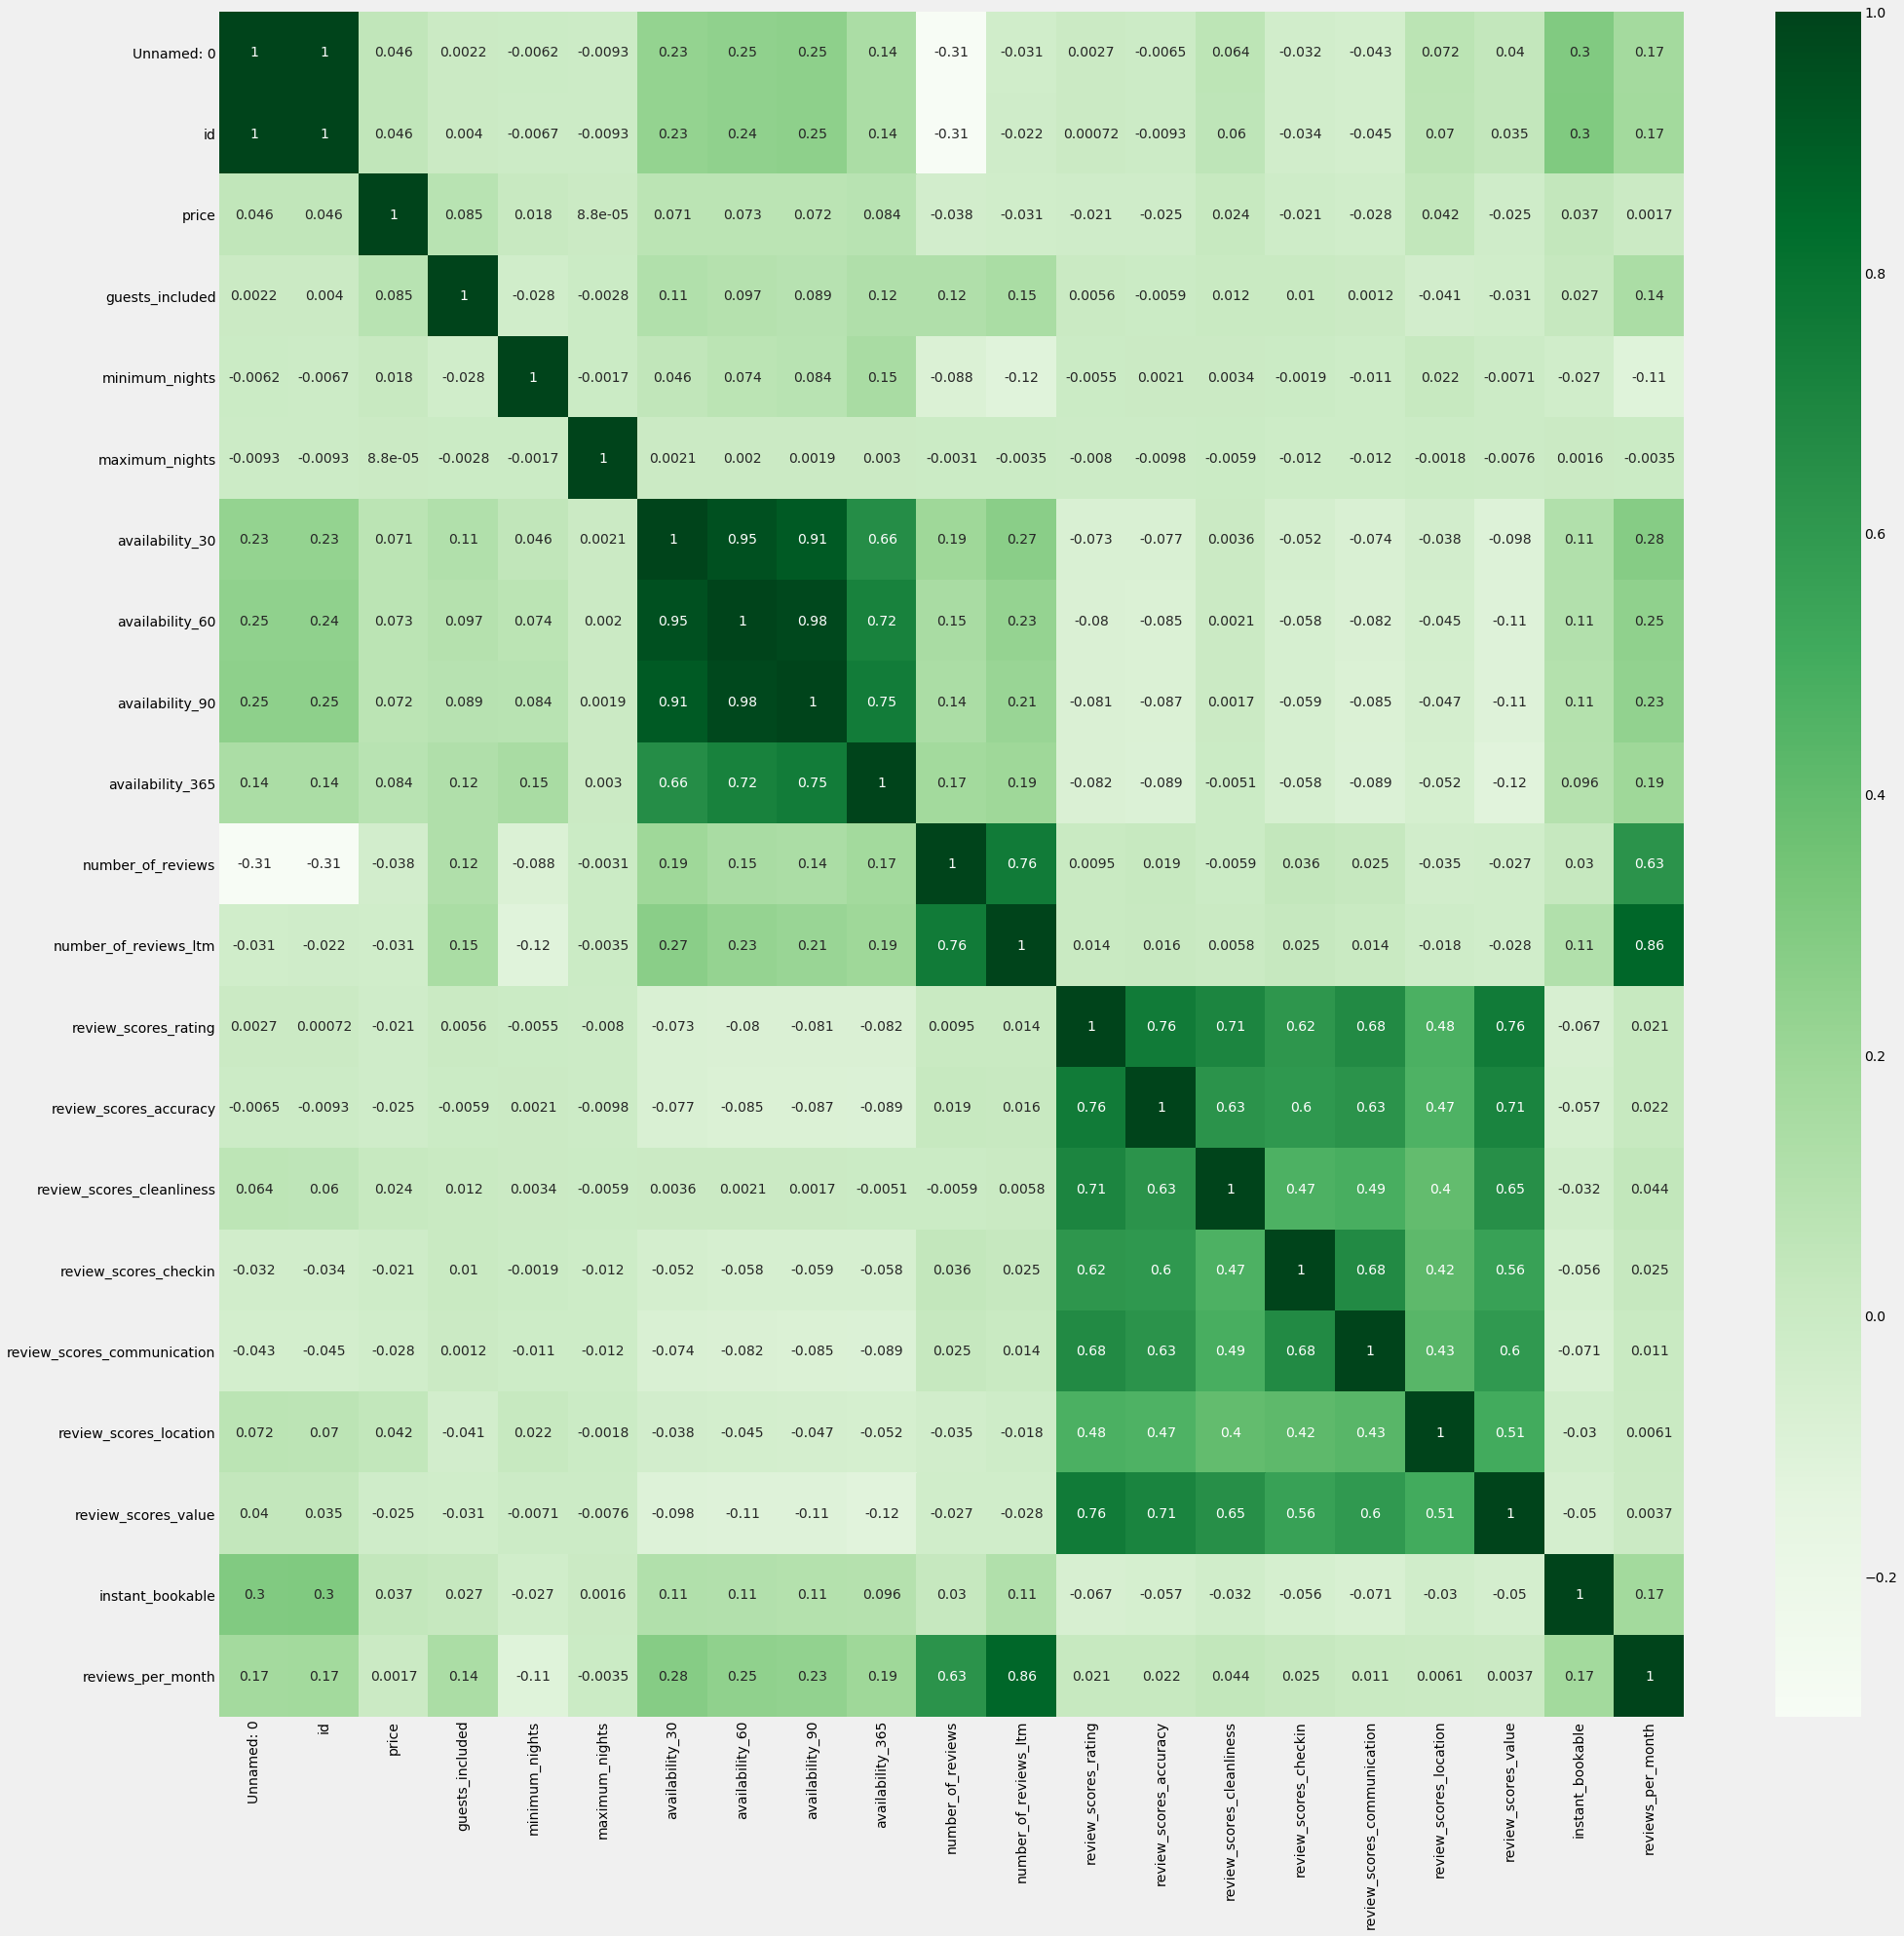

In [49]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [50]:
df

,Unnamed: 0,id,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,0,2060,100,1,1,730,30,60,90,365,...,0,80.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.01
1,1,2595,225,1,7,1125,4,34,64,339,...,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0.38
2,2,3831,89,1,1,730,6,10,13,151,...,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,0,4.71
3,3,5099,200,2,3,21,0,0,0,0,...,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,0.59
4,4,5114,94,1,1,730,30,60,90,109,...,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,50791,42890680,150,1,5,1125,25,55,85,271,...,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.64
50792,50792,42890730,149,1,2,5,23,53,83,83,...,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.64
50793,50793,42891018,188,1,3,30,30,60,90,365,...,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.64
50794,50794,42891637,1100,1,1,1125,23,28,29,29,...,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.64
